# Plot Activity Plan Travel

In this example, we show how plans can be plotted spatially using `plotly`

In [1]:
import os

from pam import read

In [2]:
pop = read.read_matsim(
    os.path.join("data", "example_data", "example_plans.xml")
)  # load small sample from the test suite

You can generate `geopandas.GeoDataFrames` for `Population`'s, `Household`'s or `Person`'s travel. the `route_id`, `service_id` and `network_route` refer to the network used for running the simulation. `GeoDataFrame`s are very useful, they let you to generate geojsons simply and quickly, which you can then load up in kepler.

```
gdf.to_file('path/to/file/gdf.geojson'), driver='GeoJSON')
```
note that to use this geojson with kepler you will need the geometry to be in `'epsg:4326'`. You can do this with the method below.

In [3]:
pop.build_travel_geodataframe(from_epsg="epsg:27700", to_epsg="epsg:4326").head()

mode  purp  seq  freq          start_time            end_time  \
0   pt  work    1  None 1900-01-01 07:24:52 1900-01-01 07:24:52   
1   pt  None    2  None 1900-01-01 14:50:52 1900-01-01 14:50:52   
2   pt  work    1  None 1900-01-01 08:27:33 1900-01-01 08:27:33   
3   pt  None    2  None 1900-01-01 17:45:33 1900-01-01 17:45:33   
4   pt  work    1  None 1900-01-01 07:01:09 1900-01-01 07:01:09   

         start_location          end_location  \
0  (515226.0, 188222.0)  (529652.0, 183897.0)   
1  (529652.0, 183897.0)  (515226.0, 188222.0)   
2  (542920.0, 174494.0)  (534457.0, 181724.0)   
3  (534457.0, 181724.0)  (542920.0, 174494.0)   
4  (535063.0, 163365.0)  (531998.0, 166080.0)   

                                            geometry      distance service_id  \
0  LINESTRING (-0.33843 51.58109, -0.13193 51.53909)  15060.381834       None   
1  LINESTRING (-0.13193 51.53909, -0.33843 51.58109)  15060.381834       None   
2   LINESTRING (0.05545 51.45140, -0.06352 51.51844)  11130.825172       None   
3   LINESTRING (-0.06352 51.51844, 0.05545 51.45140)  11130.825172       None   
4  LINESTRING (-0.06179 51.35332, -0.10477 51.37843)   4094.563469       None   

  route_id o_stop d_stop network_route        pid        hid  
0     None   None   None            []   census_0   census_0  
1     None   None   None            []   census_0   census_0  
2     None   None   None            []   census_1   census_1  
3     None   None   None            []   census_1   census_1  
4     None   None   None            []  census_10  census_10

You can also plot travel using plotly. You will need a mapbox token, which you can get here: https://docs.mapbox.com/help/how-mapbox-works/access-tokens/. Be careful not to commit your token in the repo.

In [4]:
mapbox_access_token = "token"

You need to specify the coordinate system to plot it on a map. By default the plot will colour by mode:

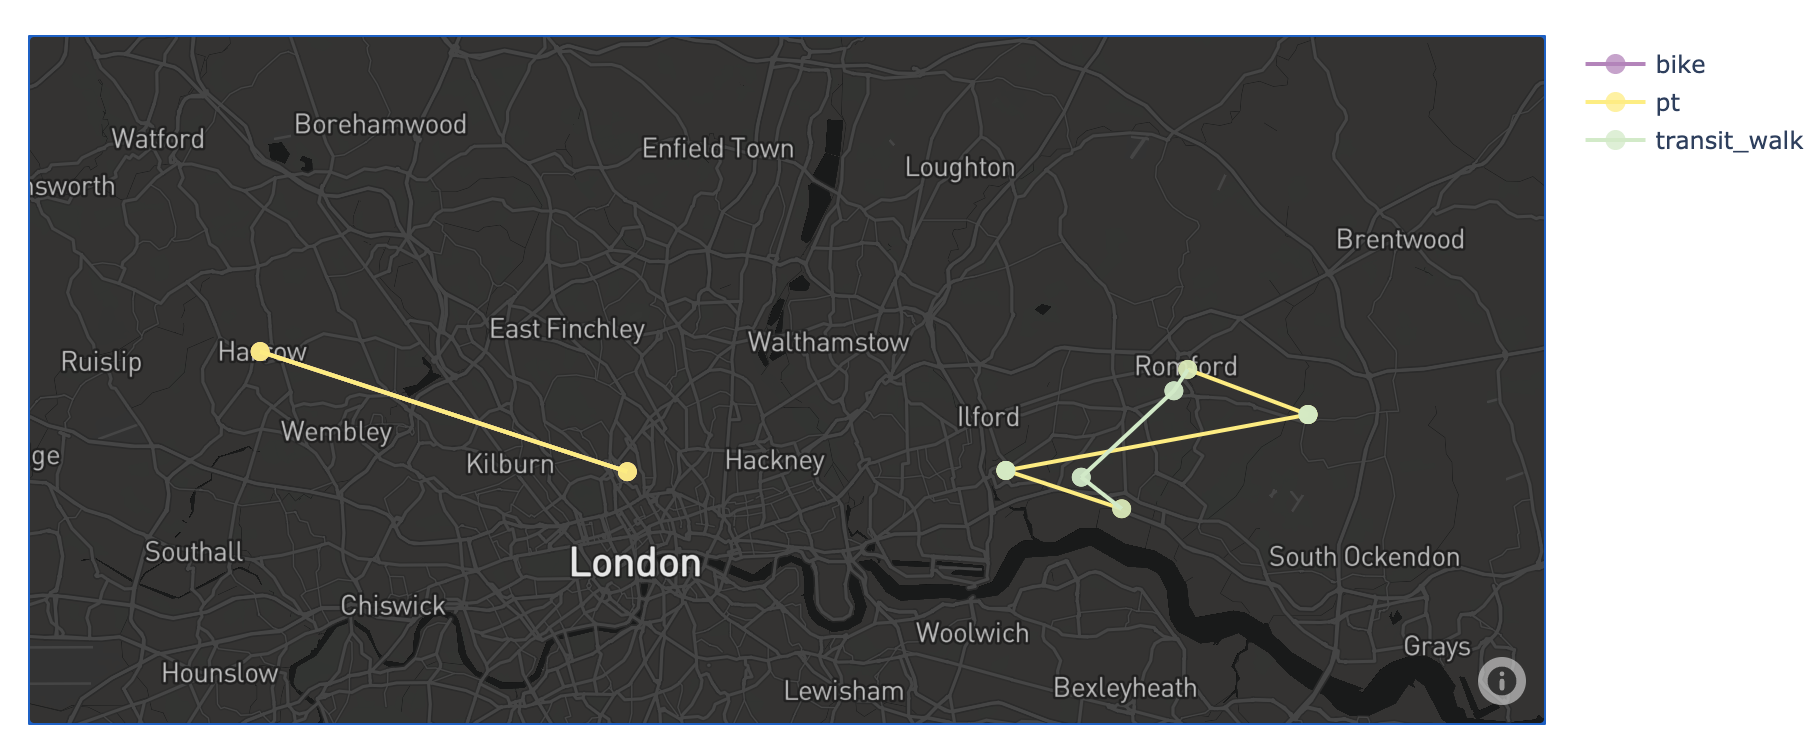

You can also colour by any column you see in the `GeoDataFrame` (see above). E.g. to colour by agent id (`pid`)

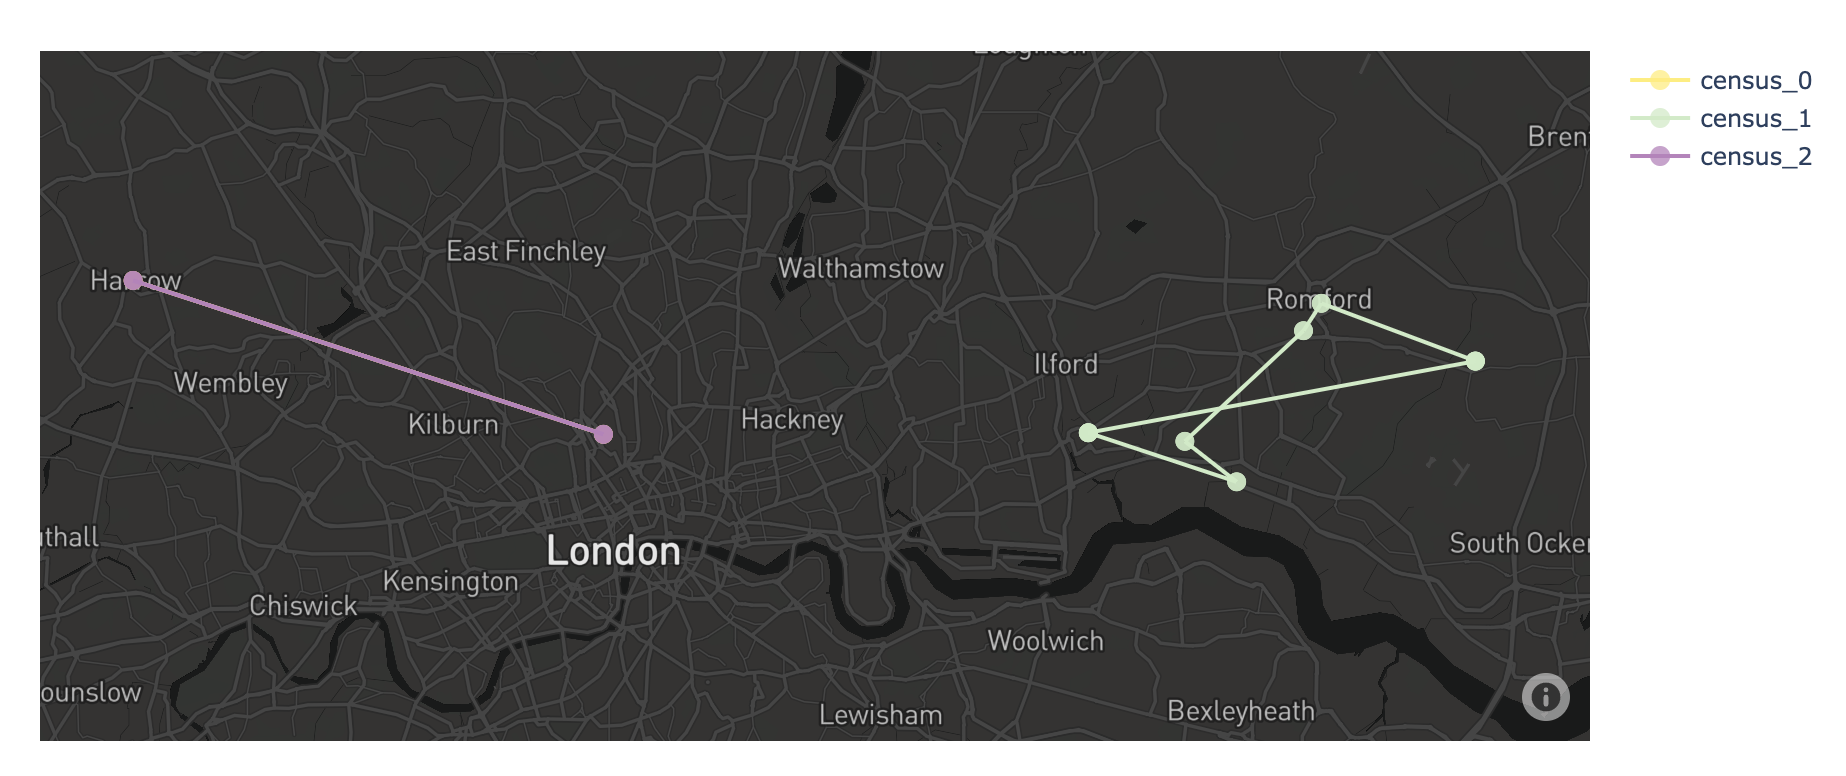